### I am taking help of CampusX SIR's notebook help in this. [Notebook](https://github.com/campusx-official/dsmp-capstone-project/blob/master/feature-engineering.ipynb)

In [1]:
from ast import literal_eval
import re

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_colwidth', 100)

In [3]:
df = pd.read_csv('data/processed/1.1_CLEANING_flats.csv')
print(df.shape)

(2785, 27)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785 entries, 0 to 2784
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   link             2785 non-null   object 
 1   society          2785 non-null   object 
 2   price            2785 non-null   float64
 3   area             2785 non-null   object 
 4   areaWithType     2785 non-null   object 
 5   bedRoom          2785 non-null   int64  
 6   bathroom         2785 non-null   int64  
 7   balcony          2785 non-null   int64  
 8   additionalRoom   2785 non-null   object 
 9   address          2782 non-null   object 
 10  facing           2037 non-null   object 
 11  agePossession    2784 non-null   object 
 12  nearbyLocations  2785 non-null   object 
 13  description      2785 non-null   object 
 14  furnishDetails   2785 non-null   object 
 15  features         2785 non-null   object 
 16  property_id      2785 non-null   object 
 17  nthFloor      

In [5]:
df.isnull().sum()

link                 0
society              0
price                0
area                 0
areaWithType         0
bedRoom              0
bathroom             0
balcony              0
additionalRoom       0
address              3
facing             748
agePossession        1
nearbyLocations      0
description          0
furnishDetails       0
features             0
property_id          0
nthFloor             1
totalFloor           1
Transportation       0
Education            0
Healthcare           0
Shopping             0
Dining               0
Accommodation        0
Entertainment        0
Service              0
dtype: int64

## Plan of Attack

1. I am going going to extract features from the dataset to perform EDA.

## society ->> sector

1. Extract sector number from this column.
2. There are many sectors which are **not labeled with sector number**. So I need to hard code it.

In [6]:
# Sir's method of extracting sectors

df['sector_by_sir'] = (
    df['address']
    .str.split(',')
    .str.get(0)
    .str.replace(r'sector.*', '', regex=True)
    .str.replace(r'road|gurgaon', '', regex=True)
    .str.strip()
    .apply(lambda x: x if x else np.nan)
)

In [7]:
df['sector_by_sir'].nunique()

703

In [8]:
df['sector_by_sir'].unique()[:80]

array(['krishna colony', '46b', 'sohna', nan, 'dwarka expressway', 'h 23',
       'flat no. :- 301', 'senate court', 'g04', 'godrej habitat',
       'new palam vihar', 'tower a-4', 't 3', '101', 'c 488', '609',
       'flat no 201', 'tower 5', 'dlf phase 4', 'a253', 'plot no. 833',
       '1422 bahadurgarh', 'h1202', 'tower 6', '802/b5', '#1101', 'near',
       '3bhk', 'laxman vihar', 'f 150/b', 'godrej oasis', '401',
       'emaar palm premier', 'tower 2 floor 4th', '4302', '621/622',
       'tower 18', 's-68/3', 'sushant lok phase 1', 'tower - k',
       'bhagwati sadan', 'n54c', 'ashok vihar phase 2', 'rajiv colony',
       'garauli kalan', 'bhawani enclave', 'j002', 'iffco chowk', 'b33',
       '1057', 'b1101', 'tower a', '104', '604', 'a5-3102', 'gwal pahari',
       'plot 833 flat 202', 'central park flower valley', 'malibu town',
       'golf course extension', 'chakkarpur', 'tower 6 402', 's-70/1',
       'flat no. c-014', 'flat no. 002', 'block b', 'pc02', 'mid floor',
       

In [9]:
df['sector_by_sir'].isnull().sum()

1383

In [10]:
def zfill_(match: re.Match[str]):
    return match.group(1).zfill(3)

In [11]:
# My method of extracting sectors

df['sector_by_me'] = (
    df['address']
    .astype(str)
    .add(' ')
    .add(df['description'].str.lower().astype(str))
    .str.replace('-', ' ')
    .str.replace(r'\s{2,}', ' ', regex=True)
    .str.extract(r'(sector \d+\w?)')[0]
)

In [12]:
df['sector_by_me'].nunique()

99

In [13]:
df[
    df['address']
    .astype(str)
    .add(' ')
    .add(df['description'].str.lower().astype(str))
    .str.contains('sector')
    == False
]['address'].shape

(309,)

In [14]:
df['sector_by_me'].unique()

array([nan, 'sector 61', 'sector 92', 'sector 36', 'sector 104',
       'sector 88b', 'sector 78', 'sector 81', 'sector 79', 'sector 33',
       'sector 90', 'sector 108', 'sector 62', 'sector 102', 'sector 89',
       'sector 113', 'sector 65', 'sector 48', 'sector 37c', 'sector 3',
       'sector 43', 'sector 88a', 'sector 68', 'sector 109', 'sector 106',
       'sector 82', 'sector 85', 'sector 82a', 'sector 10a', 'sector 1a',
       'sector 4', 'sector 84', 'sector 71', 'sector 7', 'sector 77',
       'sector 37d', 'sector 67a', 'sector 57', 'sector 95', 'sector 99a',
       'sector 103', 'sector 49', 'sector 30', 'sector 86', 'sector 66',
       'sector 15', 'sector 93', 'sector 22', 'sector 63a', 'sector 95a',
       'sector 52', 'sector 67', 'sector 107', 'sector 12a', 'sector 2',
       'sector 99', 'sector 91', 'sector 1', 'sector 70', 'sector 70a',
       'sector 54', 'sector 111', 'sector 41', 'sector 12', 'sector 73',
       'sector 56', 'sector 83', 'sector 53', 'sector 72

I am able to extract these many pure sector values from the dataset. But this is not enough.

In [15]:
df['sector_by_me'].isnull().sum()

310

In [16]:
# Merge sector_by_sir and sector_by_me columns and then do the extra works

df['sector'] = (
    df['sector_by_me']
    .fillna('')
    .add(' ')
    .add(df['sector_by_sir'].fillna(''))
    .str.replace(r'(sector \d+\w?)( .*)', r'\1', regex=True)
    .str.strip()
    .apply(lambda x: x if x else np.nan)
)

In [17]:
df['sector'].isnull().sum()

0

In [18]:
df['sector'].nunique()

233

In [19]:
df['sector'].unique()[:80]

array(['krishna colony', '46b', 'sohna', 'sector 61', 'sector 92',
       'sector 36', 'dwarka expressway', 'sector 104', 'sector 88b',
       'sector 78', 'sector 81', 'sector 79', 'sector 33', 'sector 90',
       'sector 108', 'sector 62', 'sector 102', 'sector 89', 'sector 113',
       'sector 65', 'sector 48', 'sector 37c', 'sector 3',
       'new palam vihar', 'sector 43', 'sector 88a', 'sector 68',
       'sector 109', 't 3', 'sector 106', 'sector 82', 'flat no 201',
       'sector 85', 'sector 82a', 'dlf phase 4', 'a253', 'sector 10a',
       'sector 1a', 'sector 4', 'sector 84', 'sector 71', 'sector 7',
       'h1202', 'sector 77', 'sector 37d', 'sector 67a', 'sector 57',
       'sector 95', 'sector 99a', 'sector 103', 'sector 49', 'sector 30',
       'sector 86', 'sector 66', 'sector 15', 'laxman vihar', 'f 150/b',
       'sector 93', 'sector 22', 'sector 63a', 'sector 95a', '621/622',
       'tower 18', 'sector 52', 'sector 67', 'sushant lok phase 1',
       'sector 107', 'se

In [20]:
extra_sectors_naming = {
    '46b': 'sector 46b',
    'dharam colony': 'sector 12',
    'krishna colony': 'sector 7',
    'suncity': 'sector 54',
    'prem nagar': 'sector 13',
    'mg road': 'sector 28',
    'gandhi nagar': 'sector 28',
    'laxmi garden': 'sector 11',
    'shakti nagar': 'sector 11',
    'baldev nagar': 'sector 7',
    'shivpuri': 'sector 7',
    'garhi harsaru': 'sector 17',
    'imt manesar': 'sector 4',
    'adarsh nagar': 'sector 12',
    'shivaji nagar': 'sector 11',
    'bhim nagar': 'sector 6',
    'madanpuri': 'sector 7',
    'saraswati vihar': 'sector 28',
    'arjun nagar': 'sector 8',
    'ravi nagar': 'sector 9',
    'vishnu garden': 'sector 105',
    'bhondsi': 'sector 11',
    'surya vihar': 'sector 21',
    'devilal colony': 'sector 9',
    'valley view estate': 'sector 54',
    'mehrauli  road': 'sector 14',
    'jyoti park': 'sector 7',
    'ansal plaza': 'sector 23',
    'dayanand colony': 'sector 6',
    'sushant lok phase 2': 'sector 55',
    'chakkarpur': 'sector 28',
    'greenwood city': 'sector 45',
    'subhash nagar': 'sector 12',
    'sohna road road': 'sector 33',
    'malibu town': 'sector 47',
    'surat nagar 1': 'sector 104',
    'new colony': 'sector 7',
    'mianwali colony': 'sector 12',
    'jacobpura': 'sector 12',
    'rajiv nagar': 'sector 13',
    'rajiv colony': 'sector 33',
    'ashok vihar': 'sector 3',
    'dlf phase 1': 'sector 26',
    'near to sikanderpur metro station': 'sector 26',
    'nirvana country': 'sector 50',
    'palam vihar': 'sector 2',
    'new palam vihar': 'sector 110',
    'dlf phase 2': 'sector 25',
    'sushant lok phase 1': 'sector 43',
    'laxman vihar': 'sector 4',
    'laxman vihar phase 2': 'sector 4',
    'dlf phase 4': 'sector 28',
    'dlf phase 3': 'sector 24',
    'sushant lok phase 3': 'sector 57',
    'dlf phase 5': 'sector 43',
    'rajendra park': 'sector 105',
    'uppals southend': 'sector 49',
    'sohna': 'sector 33',
    'sohna road': 'sector 33',
    'ashok vihar phase 3 extension': 'sector 5',
    'south city 1': 'sector 41',
    'ashok vihar phase 2': 'sector 5',
    '35/2690 ashok vihar phase 2': 'sector 5',
    "garauli kalan": 'sector 45',
    "bhawani enclave": 'sector 56',
    "iffco chowk": 'sector 29',
    'sai kunj': 'sector 110a',
    'manesar': 'Sector 4',
    'shankar vihar': 'sector 104',
    'patel nagar': 'sector 15',
    'dwarka expressway': 'sector 88a',
    'gwal pahari': 'sector 2',
    'paras quartier': 'sector 29',
    'ambience island': 'sector 24',
    'lajpat nagar': 'sector 29',
    'mehrauli': 'sector 29',
    'central park flower valley': 'sector 32',
}

In [21]:
df['sector'] = df['sector'].replace(extra_sectors_naming).str.replace(r'(\d+)', zfill_, regex=True)

In [22]:
df['sector'].unique()

array(['sector 007', 'sector 046b', 'sector 033', 'sector 061',
       'sector 092', 'sector 036', 'sector 088a', 'sector 104',
       'sector 088b', 'sector 078', 'sector 081', 'sector 079',
       'sector 090', 'sector 108', 'sector 062', 'sector 102',
       'sector 089', 'sector 113', 'sector 065', 'sector 048',
       'sector 037c', 'sector 003', 'sector 110', 'sector 043',
       'sector 068', 'sector 109', 't 003', 'sector 106', 'sector 082',
       'flat no 201', 'sector 085', 'sector 082a', 'sector 028', 'a253',
       'sector 010a', 'sector 001a', 'sector 004', 'sector 084',
       'sector 071', 'h1202', 'sector 077', 'sector 037d', 'sector 067a',
       'sector 057', 'sector 095', 'sector 099a', 'sector 103',
       'sector 049', 'sector 030', 'sector 086', 'sector 066',
       'sector 015', 'f 150/b', 'sector 093', 'sector 022', 'sector 063a',
       'sector 095a', '621/622', 'tower 018', 'sector 052', 'sector 067',
       'sector 107', 'sector 012a', 'sector 005', 'sector 

In [23]:
drop_rows = df[df['sector'].str.contains('sector', case=False) == False].index
len(drop_rows)

131

In [24]:
df.iloc[drop_rows]['sector'].sample(15)

383                    1234
356     park view residency
1514              sultanpur
1043               the icon
598                016floor
2320                  g-004
1448                   0001
36                    t 003
2545                f block
374                t008-003
1438                   0001
1432                   0001
786                    1902
2763               t011-301
357     park view residency
Name: sector, dtype: object

In [25]:
# I am going to drop the extra rows which are not labeled with sector number
df.drop(index=drop_rows, inplace=True)

In [26]:
df.shape

(2654, 30)

## area

In [27]:
df['area'] = df['area'].str.replace(',', '').str.extract(r'(\d+)').astype('float')

In [28]:
df['area'] = df['price'].mul(1_00_000).div(df['area']).astype('int')

## areaWithType

In [29]:
df['areaWithType'].sample(5)

774     Super Built up area 1963(182.37 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.)
1176    Super Built up area 1404(130.44 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.)
330                                            Super Built up area 2786(258.83 sq.m.)
2752                                               Built Up area: 2000 (185.81 sq.m.)
2000     Super Built up area 2557(237.55 sq.m.)Carpet area: 2550 sq.ft. (236.9 sq.m.)
Name: areaWithType, dtype: object

In [30]:
print(
    'Super Built up area -',
    df['areaWithType'][df['areaWithType'].str.contains('Super Built up area')].shape[0],
)
print(
    'Built up area -',
    df['areaWithType'][df['areaWithType'].str.contains('Built Up area')].shape[0],
)
print('Carpet area -', df['areaWithType'][df['areaWithType'].str.contains('Carpet area')].shape[0])

Super Built up area - 1749
Built up area - 848
Carpet area - 1616


In [31]:
df['built_up_area'] = df['areaWithType'].str.extract(r'Built Up area: (\d+.?\d+?)').astype(float)
df['carpet_area'] = df['areaWithType'].str.extract(r'Carpet area: (\d+.?\d+?)').astype(float)
df['super_built_up_area'] = (
    df['areaWithType'].str.replace('(', ' ').str.extract(r'Super Built up area (\d+)').astype(float)
)

In [32]:
df[['area', 'super_built_up_area', 'built_up_area', 'carpet_area']].sample(10)

,area,super_built_up_area,built_up_area,carpet_area
306,2605,2605.0,NaN,NaN
100,1950,NaN,NaN,1950.0
1594,1943,1943.0,1750.0,1550.0
1039,1750,1750.0,1466.0,NaN
2264,735,735.0,NaN,NaN
1519,2812,2812.0,2600.0,2400.0
1955,1672,1672.0,NaN,NaN
2774,650,650.0,NaN,550.0
1701,1852,1852.0,NaN,1128.0
162,514,NaN,NaN,514.0


**In my case the unit of areas seems good.**

## additionalRoom

In [33]:
df['additionalRoom'] = df['additionalRoom'].str.lower()

In [34]:
additionalRooms = ['study room', 'servant room', 'store room', 'pooja room', 'others']

for col in additionalRooms:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [35]:
df.sample(5)[['additionalRoom', 'study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
37,not available,0,0,0,0,0
2773,servant room,0,1,0,0,0
1160,not available,0,0,0,0,0
1904,not available,0,0,0,0,0
74,not available,0,0,0,0,0


## agePossession

In [36]:
df['agePossession'].isnull().sum()

1

In [37]:
df['agePossession'].unique()

array(['1 to 5 Year Old', '10+ Year Old', '0 to 1 Year Old', 'Dec 2023',
       'Under Construction', 'undefined', 'Jun 2024', 'Mar 2024',
       'Dec 2025', 'By 2023', '5 to 10 Year Old', 'Sep 2025', 'Jan 2024',
       'Within 6 months', 'Jan 2027', 'Dec 2024', 'Oct 2024', 'Nov 2023',
       'Jul 2026', 'Feb 2024', 'Oct 2023', 'Jan 2025', 'Aug 2023', nan,
       'By 2024', 'Apr 2024', 'Nov 2025', 'Dec 2026', 'Within 3 months',
       'Apr 2026', 'By 2025', 'Jul 2027', 'Sep 2023', 'By 2027',
       'Jan 2026', 'May 2024', 'Nov 2024', 'Aug 2024', 'Mar 2025',
       'Jul 2024', 'Jul 2025', 'Sep 2027', 'Jun 2025', 'Jan 2028',
       'Aug 2026', 'Mar 2026', 'Aug 2025', 'Oct 2025'], dtype=object)

In [38]:
def categorize_age_possession(value: str) -> str:
    if pd.isna(value):
        return "undefined"
    if "0 to 1 Year Old" == value or "Within 6 months" == value or "Within 3 months" == value:
        return "New Property"
    if "1 to 5 Year Old" == value:
        return "Relatively New"
    if "5 to 10 Year Old" == value:
        return "Moderately Old"
    if "10+ Year Old" == value:
        return "Old Property"
    if "Under Construction" == value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])  # <<- Raises ValueError
        return "Under Construction"
    except ValueError:
        return "undefined"

In [39]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [40]:
df['agePossession'].value_counts()

agePossession
Relatively New        1375
New Property           450
Moderately Old         311
Under Construction     220
undefined              199
Old Property            99
Name: count, dtype: int64

In [41]:
df[df['agePossession'].str.contains('undefined') == True].sample(5)

,link,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,...,sector_by_me,sector,built_up_area,carpet_area,super_built_up_area,study room,servant room,store room,pooja room,others
2305,1-bhk-bedroom-apartment-flat-for-sale-in-rof-aalayas-sector-102-gurgaon-750-sq-ft-spid-Z69515124,ROF Aalayas,45.0,750,Built Up area: 750 (69.68 sq.m.),1,1,2,not available,"sector 102, sector 102 gurgaon, gurgaon, haryana",...,sector 102,sector 102,750.0,NaN,NaN,0,0,0,0,0
2576,3-bhk-bedroom-apartment-flat-for-sale-in-mehrauli-gurgaon-road-gurgaon-1760-sq-ft-spid-B68924952,Essel Towers,220.0,1760,Carpet area: 1760 (163.51 sq.m.),3,4,-1,not available,"mehrauli gurgaon road, mehrauli gurgaon road, gurgaon, haryana",...,NaN,sector 029,NaN,1760.0,NaN,0,0,0,0,0
199,2-bhk-bedroom-apartment-flat-for-sale-in-housing-apna-enclave-sector-4-gurgaon-950-sq-ft-spid-E6...,Housing Apna Enclave,39.0,950,Built Up area: 950 (88.26 sq.m.)Carpet area: 750 sq.ft. (69.68 sq.m.),2,2,1,not available,"sector 4, sector 4 gurgaon, gurgaon, haryana",...,sector 4,sector 004,950.0,750.0,NaN,0,0,0,0,0
2619,3-bhk-bedroom-apartment-flat-for-sale-in-smart-world-gems-sector-89-gurgaon-1423-sq-ft-spid-C691...,Smart World Gems,120.0,1422,Built Up area: 1423 (132.2 sq.m.)Carpet area: 920 sq.ft. (85.47 sq.m.),3,3,2,not available,"sector 89, sector 89 gurgaon, gurgaon, haryana",...,sector 89,sector 089,1423.0,920.0,NaN,0,0,0,0,0
2746,4-bhk-bedroom-apartment-flat-for-sale-in-adarsh-nagar-gurgaon-3150-sq-ft-spid-Z68946778,Lord Krishna,270.0,3150,Built Up area: 3150 (292.64 sq.m.),4,3,3,not available,"adarsh nagar, sector 12a, adarsh nagar, gurgaon, haryana",...,sector 12a,sector 012a,3150.0,NaN,NaN,0,0,0,0,0


For nnow, I found a relation between `ageposession` and `additionalRoom` columns is that wherever **additionalRoom** is `'not available` the **ageposession** is `'undefined'`.

## furnishDetails

In [42]:
df['furnishDetails'] = df['furnishDetails'].apply(literal_eval)

In [43]:
distinct_furnish = (
    df['furnishDetails'].explode().str.replace(r'.*\s', '', regex=True).unique().tolist()
)
distinct_furnish = [i for i in distinct_furnish if isinstance(i, str)]
len(distinct_furnish)

17

In [44]:
distinct_furnish

['Fan',
 'Light',
 'Wardrobe',
 'AC',
 'Bed',
 'Chimney',
 'Curtains',
 'Table',
 'Geyser',
 'Kitchen',
 'Microwave',
 'Fridge',
 'Sofa',
 'Stove',
 'TV',
 'Machine',
 'Purifier']

In [45]:
df['furnishDetails'] = df['furnishDetails'].astype(str)
furnish_df = pd.DataFrame()

for furnish in distinct_furnish:
    furnish_df[furnish] = df['furnishDetails'].str.extract(fr'(\d+) {furnish}')[0]
    furnish_df[furnish] = furnish_df[furnish].fillna(0).astype(int)

In [46]:
furnish_df.sample(10)

,Fan,Light,Wardrobe,AC,Bed,Chimney,Curtains,Table,Geyser,Kitchen,Microwave,Fridge,Sofa,Stove,TV,Machine,Purifier
1462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2263,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1235,8,15,3,5,0,1,1,0,5,0,1,1,0,1,0,0,0
475,5,7,0,3,0,1,0,0,3,0,0,0,0,1,0,0,0
999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2046,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
380,12,50,0,7,0,1,1,0,4,0,1,0,0,1,0,0,0
237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2771,0,0,0,4,0,1,0,0,0,0,0,0,0,1,0,0,0


In [47]:
scaler = StandardScaler()
furnish_scaled = scaler.fit_transform(furnish_df)

In [48]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(furnish_scaled)
    wcss_reduced.append(kmeans.inertia_)

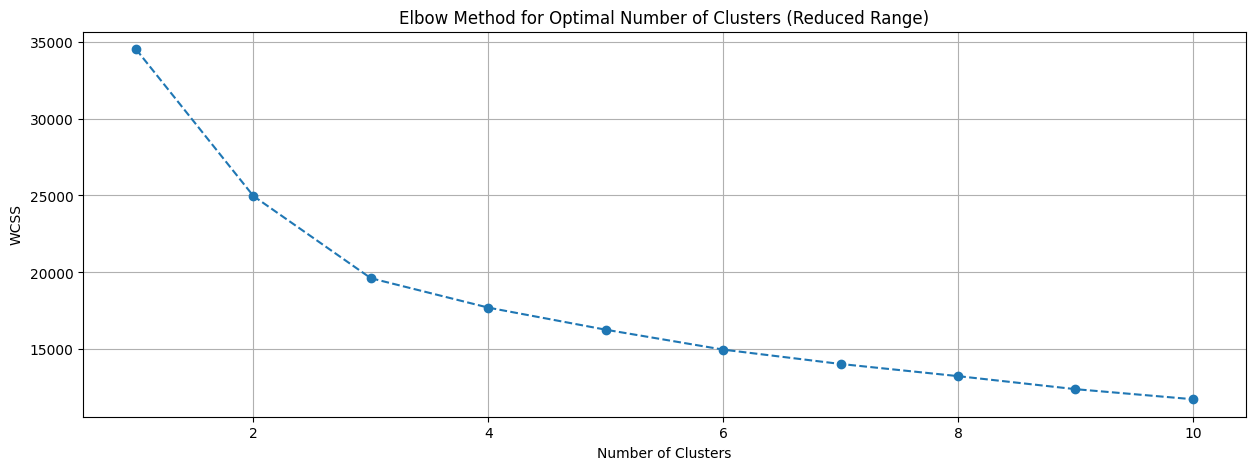

In [49]:
# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(range(1, 11), wcss_reduced, marker='o', linestyle='--')

plt.title('Elbow Method for Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [50]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
kmeans.fit(furnish_scaled)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(furnish_scaled)

In [51]:
df['furnish_type'] = cluster_assignments

In [52]:
df[['furnishDetails', 'furnish_type']]

,furnishDetails,furnish_type
0,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Ta...",1
1,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light', '1 Curtains', '1 Chimney', '1 Mo...",0
2,[],1
3,[],1
4,[],1
...,...,...
2780,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Ta...",1
2781,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light', '1 Curtains', '1 Chimney', '1 Mo...",0
2782,[],1
2783,[],1


**furnish_type**

- `0` -> **unfurnished**
- `1` -> **semifurnished**
- `2` -> **furnished**

## features

In the feature engineering session of the course Sir's method got failed becuse the newly created feature `luxury_score` of flats has not a signoficant co-relation with `price` target feature.

**That's why I am not going to follow the Sir's method. I am goning to find my way to deal with this column.**

In [53]:
df['features'] = df['features'].apply(literal_eval)

In [54]:
df['features'].explode().unique()

array(['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)',
       'Water Storage', 'Visitor Parking', 'Maintenance Staff', 'Park',
       'Power Back-up', 'Intercom Facility', 'Swimming Pool',
       'Fitness Centre / GYM', 'Club house / Community Center',
       'Private Garden / Terrace', 'False Ceiling Lighting',
       'Natural Light', 'Airy Rooms', 'Water softening plant', nan,
       'Security Personnel', 'Internet/wi-fi connectivity',
       'Rain Water Harvesting', 'Separate entry for servant room',
       'Spacious Interiors', 'Waste Disposal', 'Piped-gas',
       'Shopping Centre', 'Water purifier', 'No open drainage around',
       'Low Density Society', 'Bank Attached Property',
       'High Ceiling Height', 'Centrally Air Conditioned',
       'Recently Renovated'], dtype=object)

In [55]:
apartments = pd.read_csv('data/appartments.csv', usecols=['PropertyName', 'TopFacilities'])
print(apartments.shape)
apartments.head(2)

(247, 2)


,PropertyName,TopFacilities
0,Smartworld One DXP,"['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club ..."
1,M3M Crown,"['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading..."


In [56]:
apartments['TopFacilities'].isnull().sum()

0

In [57]:
drop_rows = apartments[apartments['TopFacilities'].str.startswith('[') == False].index
apartments.drop(index=drop_rows, inplace=True)

In [58]:
apartments['TopFacilities'] = apartments['TopFacilities'].apply(literal_eval)

In [59]:
null_features_df = df[['society', 'features']][
    df['features'].apply(lambda x: x if x else np.nan).isnull()
]
null_features_df['society'] = null_features_df['society'].str.lower()

null_features_df.head()

,society,features
4,parkwood westend,[]
5,signature global infinity mall,[]
6,the cocoon,[]
12,supertech araville,[]
13,godrej,[]


In [60]:
apartments['PropertyName'] = apartments['PropertyName'].str.lower()

In [61]:
temp_df = null_features_df.merge(
    apartments,
    left_on='society',
    right_on='PropertyName',
    how='left',
)

In [62]:
df.loc[null_features_df.index, 'features'] = temp_df['TopFacilities'].values

In [63]:
df['features'].isnull().sum()

209

In [64]:
# df['features'] = df['features'].apply(lambda x: [] if isinstance(x, float) else x)

## General Step

**Some major points**

1. I didn't work upon `nearbyLocation`. Although I did something in [1.1_CLEANING.ipynb](./1.1_CLEANING.ipynb)

In [65]:
df.columns

Index(['link', 'society', 'price', 'area', 'areaWithType', 'bedRoom',
       'bathroom', 'balcony', 'additionalRoom', 'address', 'facing',
       'agePossession', 'nearbyLocations', 'description', 'furnishDetails',
       'features', 'property_id', 'nthFloor', 'totalFloor', 'Transportation',
       'Education', 'Healthcare', 'Shopping', 'Dining', 'Accommodation',
       'Entertainment', 'Service', 'sector_by_sir', 'sector_by_me', 'sector',
       'built_up_area', 'carpet_area', 'super_built_up_area', 'study room',
       'servant room', 'store room', 'pooja room', 'others', 'furnish_type'],
      dtype='object')

In [66]:
df.isnull().sum()

link                      0
society                   0
price                     0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
address                   3
facing                  707
agePossession             0
nearbyLocations           0
description               0
furnishDetails            0
features                209
property_id               0
nthFloor                  1
totalFloor                1
Transportation            0
Education                 0
Healthcare                0
Shopping                  0
Dining                    0
Accommodation             0
Entertainment             0
Service                   0
sector_by_sir          1383
sector_by_me            179
sector                    0
built_up_area          1806
carpet_area            1038
super_built_up_area     905
study room                0
servant room              0
store room          

In [67]:
df.drop(
    columns=[
        'areaWithType',
        'additionalRoom',
        'address',
        'furnishDetails',
        'sector_by_sir',
        'sector_by_me',
    ],
    inplace=True,
)

In [68]:
pd.set_option('display.max_columns', None)
df.sample(5)

,link,society,price,area,bedRoom,bathroom,balcony,facing,agePossession,nearbyLocations,description,features,property_id,nthFloor,totalFloor,Transportation,Education,Healthcare,Shopping,Dining,Accommodation,Entertainment,Service,sector,built_up_area,carpet_area,super_built_up_area,study room,servant room,store room,pooja room,others,furnish_type
2427,2-bhk-bedroom-apartment-flat-for-sale-in-smart-world-gems-sector-89-gurgaon-1103-sq-ft-spid-J692...,Smart World Gems,88.0,1103,2,2,0,NaN,undefined,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', '...",Best in class property available at sector 89 location in gurgaon,"[Swimming Pool, Lounge, Aerobics Centre, Terrace Garden, Piped Gas, Squash Court, Gazebo, Wi-Fi ...",J69238068,2.0,2.0,6,2,1,1,0,1,2,0,sector 089,1103.0,NaN,NaN,0,0,0,0,0,1
377,4-bhk-bedroom-apartment-flat-for-sale-in-indiabulls-centrum-park-sector-103-gurgaon-2875-sq-ft-s...,Indiabulls Centrum Park,245.0,2875,4,6,3,NaN,Relatively New,"['Gurgaon Dreamz Mall', 'HUDA Market, Sector 14', 'Dwarka Expressway', 'Delhi Gurgaon Expressway...",Near upcoimg dwarka maneser express way. Near to dwarka new delhi,"[Power Back-up, Lift(s), Swimming Pool, Park, Shopping Centre, Fitness Centre / GYM, Club house ...",V69714126,5.0,18.0,5,3,1,1,0,1,3,0,sector 103,NaN,NaN,2875.0,0,1,0,0,0,1
2681,2-bhk-bedroom-apartment-flat-for-sale-in-smart-world-gems-sector-89-gurgaon-1103-sq-ft-r2-spid-G...,Smart World Gems,86.0,1103,2,3,2,North-East,New Property,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', '...","Park facing, green belt, at very reasonable rate on 4th floor..","[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance St...",G66179018,4.0,4.0,6,2,1,1,0,1,2,0,sector 089,NaN,1103.0,NaN,1,1,0,1,0,0
1477,2-bhk-bedroom-apartment-flat-for-sale-in-godrej-101-sector-79-gurgaon-1559-sq-ft-spid-W69483012,Godrej 101,133.0,1559,2,2,3,North-West,Relatively New,"['Vatika Town Square-INXT', 'Naurangpur Road', 'NH 48', 'Euro International School', 'Gurugram U...",Godrej 101 is one of gurgaon's most sought after destination for apartments and this 2 bhk flat ...,"[Centrally Air Conditioned, Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, ...",W69483012,6.0,15.0,3,2,0,0,0,1,1,0,sector 079,NaN,NaN,1559.0,1,0,0,0,0,1
2351,1-bhk-bedroom-apartment-flat-for-sale-in-signature-global-solera-sector-107-gurgaon-318-sq-ft-sp...,Signature Global Solera,25.0,317,1,1,0,NaN,undefined,"['Gurgaon Dreamz Mall', 'Dwarka Expressway', ""Colonel's Central Academy"", 'The NorthCap Universi...",1bhk multistorey apartment for resale in signature global solera at sector 107 signature global ...,"[Jogging Track, 24/7 Power Backup, Gated Community, Gymnasium, 24/7 Water Supply, Landscape Gard...",V69417148,0.0,4.0,2,2,2,0,1,1,2,0,sector 107,318.0,NaN,NaN,0,0,0,0,0,1


## Export dataset

In [69]:
df.to_csv('data/processed/1.0_FEAT_ENG_flats.csv', index=False)